# NGC 1 Week 1 phase 1

## 1. Perkenalan

Nama : Harun

Batch : RMT -35

Objective : Melakukan sebuah analisis untuk memperkirakan perkiraan biaya premi asurasi yang kita bayarkan dengan menggunakan machine learning dari dataset yang berisi mengenai data asuransi di United States

## 2 - Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3 - Data Loading

In [29]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
#membuat copy dari dataset yang kita miliki

data_duplicate = data.copy()

In [31]:
#check dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Pada dataset terdapat 1337 baris data
- Pada dataset ini terdapat 7 kolom, dimana masing-masing data terdiri dari 3 kolom bertipe object, 2 kolom bertipe integer, dan 2 kolom bertipe float
- Tidak terlihat adanya missing value dari data entries pada masing-masing kolom yang artinya semua datanya terisi ridak ada data yang kosong

In [32]:
#deskriptif statistik
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- usia termuda pada dataset ini adalah 18 tahun. Usia tertua adalah 64 tahun.
- Rata-rata setiap orang dalam dataset memiliki 1 anak
- Bayaran asuransi yang dibayarkan termurah berada diangka 1121 dollar sedangkan harga asuransi tertinggai berada diangkat 63770 dollar

In [33]:
#deskriptif untuk object
data.describe(include="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


- pada kolom sex memiliki 2 nilai unik yang yaitu (male dan female) yang artinya ini adalah kolom gender
- Nilai yang paling sering muncul (modus) dalam kolom ini adalah "male".
- pada kolom smoker Terdapat 2 nilai unik dalam kolom smoker, yaitu "yes" (perokok) dan "no" (bukan perokok).
- Nilai yang paling sering muncul (modus) dalam kolom ini adalah "no", yang menunjukkan mayoritas orang dalam dataset bukan perokok.
- Terdapat 4 nilai unik dalam kolom region, yaitu "southeast", "southwest", "northeast", dan "northwest".
- Nilai yang paling sering muncul (modus) dalam kolom ini adalah "southeast".yang menandakan penduduk pada dataset ini berasal dari wilayah "southeast".

In [34]:
#melihat jumlah missing value
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

tidak ada jumlah missing value menandakan semua data sudah terisi

In [35]:
# mengecek data duplikat
data.duplicated().sum()

1

Terdapat 1 baris data yang duplicate, sehingga harus kita bersihkan dahulu.

In [36]:
# menampilkan baris yang duplikat
baris_duplikat = data[data.duplicated()]

baris_duplikat

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Terlihat baris yang terduplikasi yaitu baris ke 581.

In [37]:
# menghapus data duplikat
data = data.drop_duplicates()
# menampilkan data
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Terlihat data duplikat sudah terhapus yang dimana jumlah baris awalnya adalah 1338 sekarang sudah menjadi 1337

In [38]:
# mengecek jumlah data duplikat
data.duplicated().sum()

0

data duplikatnya sudah terhapus, dan sekarang sudah 0

## 4 - Promblem Statement

### - Metode SMART

Specific: membuat model untuk memprediksi biaya asuransi

Measurable: model yang dibuat memiliki MAE dibawah dari 5

Achievable:
Dengan memanfaatkan model regresi linear, yang akan dilatih menggunakan dataset yang kita punya. Proses praproses data, pemilihan fitur, dan penyesuaian model akan diterapkan untuk meningkatkan akurasi prediksi.

Relevant:
Prediksi biaya asuransi yang akurat penting bagi pelanggan dan perusahaan asuransi untuk menentukan harga yang adil dan memahami faktor yang mempengaruhi biaya.

Time-bound:
Model akan diterapkan dan melakukan prediksi selama 3 bulan.

### - Machine Learning Model

Berdasarkan pernyataan masalah, tugas ini adalah memprediksi nilai kontinu (biaya asuransi kesehatan tahunan), sehingga model pembelajaran mesin yang tepat adalah Regression.

### - Problem Statement

membuat model untuk memprediksi biaya asuransi dengan MAE dibawah 5 yang diterapkan selama 3 bulan

## 5 - EDA

In [39]:
# menampilkan data frame hanya beberapa baris saja
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 Mengkategorikan BMI
 
 Membuat kolom baru untuk mengklasifikasikan setiap peserta ke dalam kelas "overweight" yang sesuai berdasarkan nilai BMI mereka.
 
Dengan kategori:

- Overweight class 1: 30 ≤ BMI < 35
- Overweight class 2: 35 ≤ BMI < 40
- Overweight class 3: BMI ≥ 40

In [40]:
# Mengkategorikan peserta asuransi berdasarkan kelas overweight
def classify_overweight(bmi):
    if 30 <= bmi < 35:
        return 'Overweight Class 1'
    elif 35 <= bmi < 40:
        return 'Overweight Class 2'
    elif bmi >= 40:
        return 'Overweight Class 3'
    else:
        return 'Normal'

# Tambahkan kolom baru untuk overweight class
data['overweight_class'] = data['bmi'].apply(classify_overweight)
# menampilkan kolom bmi dan kolom overweight_clas yang telah kita buat
data[['bmi', 'overweight_class']].head()

C:\Users\dell\AppData\Local\Temp\ipykernel_13460\1395938727.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overweight_class'] = data['bmi'].apply(classify_overweight)


,bmi,overweight_class
0,27.900,Normal
1,33.770,Overweight Class 1
2,33.000,Overweight Class 1
3,22.705,Normal
4,28.880,Normal


disini kita melihat kolom pada kategori overweight_class sudah ditambahkan

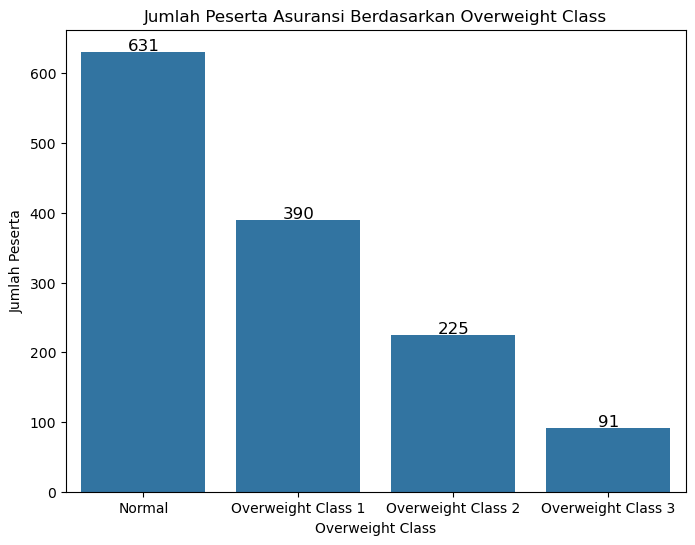

In [41]:
#  Menghitung jumlah peserta di setiap kelas overweight
count_overweight = data['overweight_class'].value_counts().sort_values(ascending=False)

# Visualisasi data dengan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=count_overweight.index, y=count_overweight.values)
plt.xlabel('Overweight Class')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Asuransi Berdasarkan Overweight Class')
# Menampilkan nilai di atas setiap bar
for index, value in enumerate(count_overweight.values):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)
plt.show()

disini kita melihat jumlah peserta asuransi berdasarkan overweight class
- normal = 631 jiwa
- overweight class 1 = 390 jiwa
- overweight class 2 = 225 jiwa
- overweight class 3 = 91 jiwa

karna muncul kategori normal maka kita hanya munculkan pada kategori overweightnya saja

In [42]:
# Menghitung jumlah peserta per kategori
count_overweight = data['overweight_class'].value_counts().drop('Normal')

# Mengurutkan dari jumlah terbanyak ke terkecil
count_overweight = count_overweight.sort_values(ascending=False)

# Menampilkan hasil
count_overweight

overweight_class
Overweight Class 1    390
Overweight Class 2    225
Overweight Class 3     91
Name: count, dtype: int64

Diatas terlihat jumlah dari masing-masing kategori overweight dari dataset yang kita miliki.

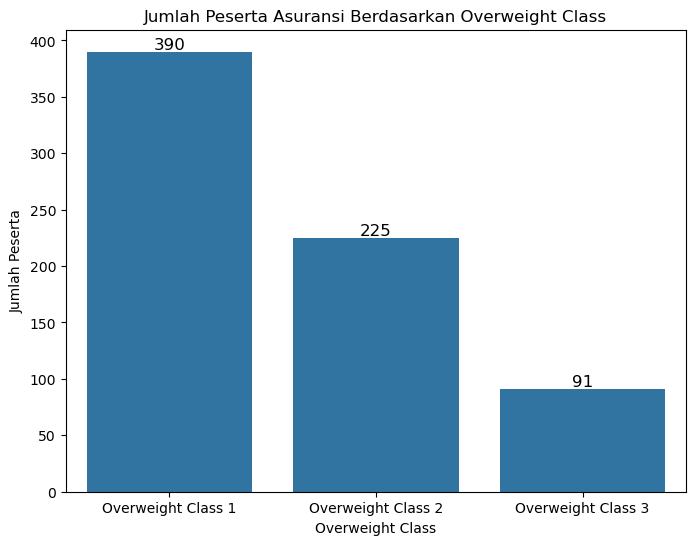

In [43]:
# Visualisasi data dengan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=count_overweight.index, y=count_overweight.values)
plt.xlabel('Overweight Class')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Asuransi Berdasarkan Overweight Class')
# Menampilkan nilai di atas setiap bar
for index, value in enumerate(count_overweight.values):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)
plt.show()

Visualisasi menggunakan barplot, terlihat dalam dataset overweight class 1 merupakan kategori yang paling banyak dibandingkan dengan overweight class 2 dan 3.